<a href="https://colab.research.google.com/github/saparbayev-azizbek-12/bi-and-ai-talents-dl/blob/main/backpropogation/backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
class Value:
  def __init__(self, data, _prev=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_prev)
    self._op = _op
    self.label = label
    self._backward = lambda:None

  def __add__(self, other):
    out = Value(self.data + other.data, _prev=(self, other), _op='+')

    def _backward():
      self.grad = 1 * out.grad
      other.grad = 1 * out.grad

    out._backward = _backward()

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _prev=(self, other), _op='*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad

    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for v in reversed(topo):
      v._backward()


  def __str__(self):
    return f"Value(data={self.data}, label={self.label})"

  def __repr__(self):
    return str(self)

In [ ]:
a = Value(4, label='a')
b = Value(-5, label='b')
c = a * b; c.label='c'
d = Value(2, label='d')
e = d * c; e.label='e'
f = Value(7, label='f')
g = e * f; g.label='g'

In [9]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot


In [ ]:
g.grad = 1

In [ ]:
e.grad = f.data
f.grad = e.data

In [ ]:
c.grad = d.data * e.grad
d.grad = c.data * e.grad

In [ ]:
a.grad = b.data * c.grad
b.grad = a.data * c.grad

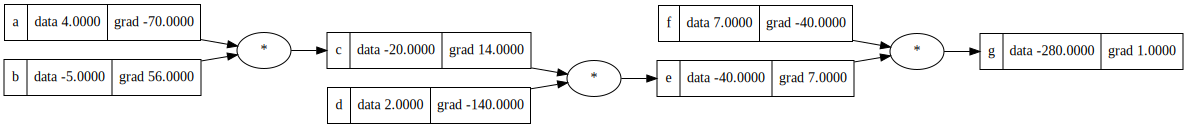

In [ ]:
draw_dot(g)

In [3]:
a = Value(4, label='a')
b = Value(-5, label='b')
c = a * b; c.label='c'
d = Value(2, label='d')
e = d * c; e.label='e'
f = Value(7, label='f')
g = e * f; g.label='g'

In [4]:
g.grad = 1

In [5]:
g._backward()

In [6]:
e._backward()
f._backward()

In [7]:
c._backward()
d._backward()

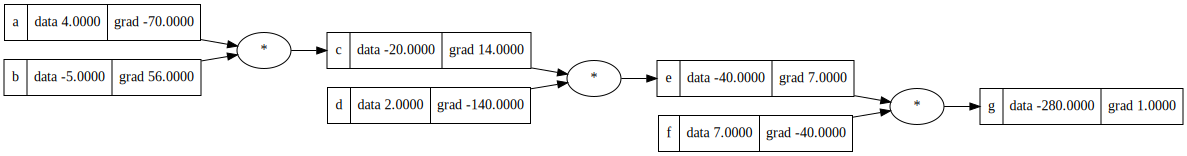

In [10]:
draw_dot(g)

In [19]:
a = Value(4, label='a')
b = Value(-5, label='b')
c = a * b; c.label='c'
d = Value(2, label='d')
e = d * c; e.label='e'
f = Value(7, label='f')
g = e * f; g.label='g'

In [20]:
g.backward()

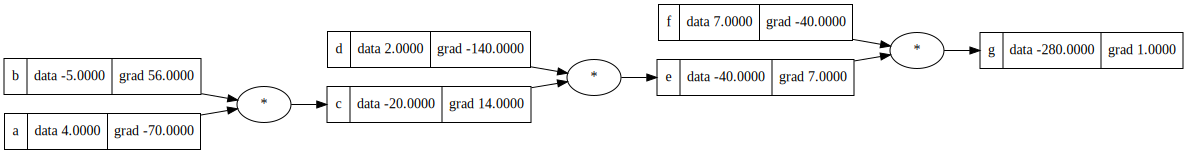

In [21]:
draw_dot(g)

In [22]:
import torch

In [45]:
tr1 = torch.randn(3, 4, dtype=torch.float, requires_grad=True)
tr2 = torch.randn(4, 5, dtype=torch.float, requires_grad=True)

In [46]:
tr3 = torch.sum(tr1 @ tr2)

In [47]:
tr3.retain_grad()

In [48]:
tr3.backward()

In [49]:
tr3.grad

tensor(1.)